In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from psynlig import plot_correlation_heatmap

In [3]:
re_type = ['linear','exp','cubic','Wshape']

In [5]:
re_type = ['linear','exponential','cubic','Wshape']

path_1 = ".../sim_results/uni_pow/" + re_type[0] + ".xlsx"
path_2 = ".../sim_results/uni_pow/" + re_type[1] + ".xlsx"
path_3 = ".../sim_results/uni_pow/" + re_type[2] + ".xlsx"
path_4 = ".../sim_results/uni_pow/" + re_type[3] + ".xlsx"
df_1 = pd.read_excel(path_1)
df_2 = pd.read_excel(path_2)
df_3 = pd.read_excel(path_3)
df_4 = pd.read_excel(path_4)

In [8]:
list(df_1['var0'])

[0.479, 0.58000004, 0.84050006, 1.0, 1.0, 1.0]

In [10]:
Type = []
NoiseLevel = []
Value = []
Nodes = []

for i in re_type:
    path_1 = ".../sim_results/uni_pow/" + i + ".xlsx"
    df_1 = pd.read_excel(path_1)
    Value = Value + list(df_1['var0'])
    NoiseLevel = NoiseLevel + ['NoiseLevel:0']*6
    Nodes = Nodes + [5,15,25,35,45,50]
    Value = Value + list(df_1['var0.05'])
    NoiseLevel = NoiseLevel + ['NoiseLevel:0.05']*6
    Nodes = Nodes + [5,15,25,35,45,50]
    Value = Value + list(df_1['var0.1'])
    NoiseLevel = NoiseLevel + ['NoiseLevel:0.1']*6
    Nodes = Nodes + [5,15,25,35,45,50]
    Type = Type + [i]*18

In [11]:
new_df = pd.DataFrame(
data = {
    'Type':Type,
    'NoiseLevel':NoiseLevel,
    'Value':Value,
    'Nodes':Nodes
}
)
new_df.head()

,Type,NoiseLevel,Value,Nodes
0,linear,NoiseLevel:0,0.4790,5
1,linear,NoiseLevel:0,0.5800,15
2,linear,NoiseLevel:0,0.8405,25
3,linear,NoiseLevel:0,1.0000,35
4,linear,NoiseLevel:0,1.0000,45


C:\Users\86181\Anaconda3\envs\Rlanguage\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\86181\Anaconda3\envs\Rlanguage\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\86181\Anaconda3\envs\Rlanguage\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\86181\Anaconda3\envs\Rlanguage\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


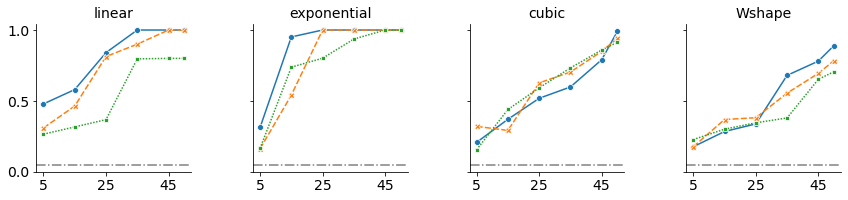

In [13]:
plt.rcParams.update({'font.size': 14,'xtick.labelsize':14,'ytick.labelsize':14,'legend.fontsize': 14})
g = sns.relplot(
    data=new_df, x="Nodes", y="Value", hue="NoiseLevel", col="Type",col_wrap=4,
    markers = True,
    style="NoiseLevel", kind="line",
    height=3, aspect=1,
    linewidth=1.5,legend =False
)
g.set(xlabel=None,xticks=[5,25,45])
g.set(ylabel=None,yticks=[0,0.5,1])
g.map(plt.axhline, y=0.05, ls="-.", color="gray")
#g.axhline(0.05, ls='-.', linewidth=1, color='gray')
g.set_titles(col_template = '{col_name}')
new_title = '' 
#g._legend.set_title(new_title)
g.fig.subplots_adjust(hspace=0.4,wspace=0.4)

plt.savefig(".../sim_results/fig/compare_uni_pow.svg",format='svg')

In [4]:
#re_type = ['linear','exponential','cubic','Wshape']

path_1 = ".../sim_results/mat_node_sample/tcor_" + re_type[0] + "_mat.csv"
path_2 = ".../sim_results/mat_node_sample/tcor_" + re_type[1] + "_mat.csv"
path_3 = ".../sim_results/mat_node_sample/tcor_" + re_type[2] + "_mat.csv"
path_4 = ".../sim_results/mat_node_sample/tcor_" + re_type[3] + "_mat.csv"
df_1 = pd.read_csv(path_1)
df_1 = df_1.drop(columns=['Unnamed: 0'])
#df_1.drop([len(df_1)-1],inplace=True)

df_2 = pd.read_csv(path_2)
df_2 = df_2.drop(columns=['Unnamed: 0'])
#df_2.drop([len(df_2)-1],inplace=True)

df_3 = pd.read_csv(path_3)
df_3 = df_3.drop(columns=['Unnamed: 0'])
#df_3.drop([len(df_3)-1],inplace=True)

df_4 = pd.read_csv(path_4)
df_4 = df_4.drop(columns=['Unnamed: 0'])
#df_4.drop([len(df_4)-1],inplace=True)

In [11]:
# Define the vectors
sample = np.array([10,20,30,40,50,60,70,80,90,100])
nodes = np.array([10,20,30,40,50,60,70,80,90,100])

# Create a matrix where each item is the ratio of the corresponding elements of the two vectors
ratio_matrix = np.outer(sample, 1/nodes)

# Print the matrix
ratio_matrix.shape

(10, 10)

In [25]:
ratio = []
value = []
Type = []

for i in re_type:
    path = ".../sim_results/mat_node_sample/tcor_" + i + "_mat.csv"
    df_1 = pd.read_csv(path)
    df_1 = df_1.drop(columns=['Unnamed: 0'])
    ratio_flat = ratio_matrix.flatten()
    data_array = np.array(df_1)
    value_flat = data_array.flatten()
    ratio = ratio + list(ratio_flat)
    value = value + list(value_flat)
    Type = Type + [i]*len(value_flat)
    
new_df = pd.DataFrame(
data = {
    'ratio':ratio,
    'value':value,
    'Type':Type
}
)
new_df.head()

,ratio,value,Type
0,1.000000,0.484935,linear
1,0.500000,0.417541,linear
2,0.333333,0.233023,linear
3,0.250000,0.251020,linear
4,0.200000,0.245538,linear


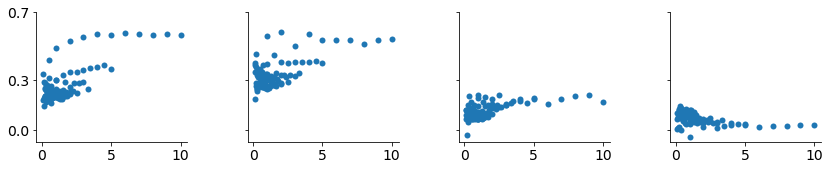

In [31]:
plt.rcParams.update({'font.size': 14,'xtick.labelsize':14,'ytick.labelsize':14,'legend.fontsize': 14})
g = sns.relplot(
    data=new_df, x="ratio", y="value", col="Type",col_wrap=4,
    kind="scatter",
    height=3, aspect=1,
    linewidth=0,legend =False
)
#g.set(xlabel=None,xscale="log")
g.set(xlabel=None)
g.set(ylabel=None,yticks=[0,0.3,0.7])
#g.map(plt.axhline, y=0.05, ls="-.", color="gray")
#g.axhline(0.05, ls='-.', linewidth=1, color='gray')
g.set_titles(col_template = '')
new_title = '' 
#g._legend.set_title(new_title)
g.fig.subplots_adjust(hspace=0.4,wspace=0.4)

#plt.savefig(".../sim_results/fig/compare_ratio.svg",format='svg')

<Figure size 432x288 with 0 Axes>

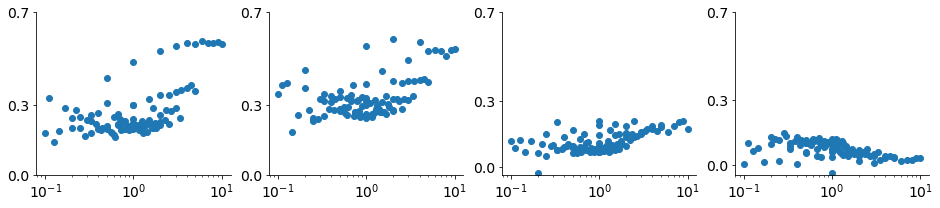

In [24]:
plt.rcParams.update({'font.size': 14,'xtick.labelsize':14,'ytick.labelsize':14,'legend.fontsize': 14})
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5)

fig = plt.figure(figsize=(16, 3))

ratio_flat = ratio_matrix.flatten()

# First subplot for hd_linear_var0.csv
ax1 = fig.add_subplot(141)

data_array = np.array(df_1)
value_flat = data_array.flatten()

ax1.scatter(ratio_flat, value_flat)
plt.xscale('log')

# Set the labels
#ax1.set(xlabel=None,xticks=[20,60,100])
#ax1.set(ylabel=None,yticks=[20,60,100])
ax1.set(ylabel=None,yticks=[0,0.3,0.7])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.set_title('Linear')

# Second subplot for hd_exp_var0.csv
ax2 = fig.add_subplot(142)

data_array = np.array(df_2)
value_flat = data_array.flatten()

ax2.scatter(ratio_flat, value_flat)
plt.xscale('log')

# Set the labels
#ax1.set(xlabel=None,xticks=[20,60,100])
#ax1.set(ylabel=None,yticks=[20,60,100])
ax2.set(ylabel=None,yticks=[0,0.3,0.7])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.set_title('Exponential')

# Second subplot for hd_exp_var0.csv
ax3 = fig.add_subplot(143)

data_array = np.array(df_3)
value_flat = data_array.flatten()

ax3.scatter(ratio_flat, value_flat)
plt.xscale('log')

# Set the labels
#ax1.set(xlabel=None,xticks=[20,60,100])
#ax1.set(ylabel=None,yticks=[20,60,100])
ax3.set(ylabel=None,yticks=[0,0.3,0.7])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
#ax3.set_title('Cubic')

# Second subplot for hd_exp_var0.csv
ax4 = fig.add_subplot(144)

data_array = np.array(df_4)
value_flat = data_array.flatten()

ax4.scatter(ratio_flat, value_flat)
plt.xscale('log')

# Set the labels
#ax1.set(xlabel=None,xticks=[20,60,100])
#ax1.set(ylabel=None,yticks=[20,60,100])
ax4.set(ylabel=None,yticks=[0,0.3,0.7])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
#ax4.set_title('W shape')

# Add colorbar
#fig.colorbar(surf, ax=[ax1, ax2, ax3, ax4], shrink=0.5, aspect=15)
#plt.savefig(".../sim_results/fig/mat_sample_node.svg",format='svg')

plt.show()

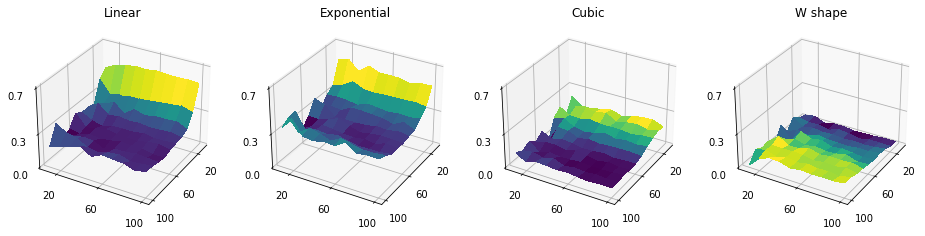

In [8]:
fig = plt.figure(figsize=(16, 8))

# First subplot for hd_linear_var0.csv
ax1 = fig.add_subplot(141, projection='3d')

# Construct arrays for the anchor positions of the bars.
x = [10,20,30,40,50,60,70,80,90,100]
y = [10,20,30,40,50,60,70,80,90,100]
X, Y = np.meshgrid(x, y)
#R = np.sqrt(X**2 + Y**2)
Z = np.array(df_1)

# Create the bar3d
ax1.plot_surface(X, Y, Z, cmap='viridis',
                       linewidth=0, antialiased=False)

# Set the labels
ax1.set_zlim(0, 0.7)
ax1.view_init(30, 30)
ax1.set(xlabel=None,xticks=[20,60,100])
ax1.set(ylabel=None,yticks=[20,60,100])
ax1.set(zlabel=None,zticks=[0,0.3,0.7])
ax1.set_title('Linear')

# Second subplot for hd_exp_var0.csv
ax2 = fig.add_subplot(142, projection='3d')

Z1 = np.array(df_2)

ax2.plot_surface(X, Y, Z1, cmap='viridis',
                       linewidth=0, antialiased=False)

# Set the labels
ax2.set_zlim(0, 0.7)
ax2.view_init(30, 30)
ax2.set(xlabel=None,xticks=[20,60,100])
ax2.set(ylabel=None,yticks=[20,60,100])
ax2.set(zlabel=None,zticks=[0,0.3,0.7])
ax2.set_title('Exponential')

# Second subplot for hd_exp_var0.csv
ax3 = fig.add_subplot(143, projection='3d')

Z2 = np.array(df_3)

ax3.plot_surface(X, Y, Z2, cmap='viridis',
                       linewidth=0, antialiased=False)

# Set the labels
ax3.set_zlim(0, 0.7)
ax3.view_init(30, 30)
ax3.set(xlabel=None,xticks=[20,60,100])
ax3.set(ylabel=None,yticks=[20,60,100])
ax3.set(zlabel=None,zticks=[0,0.3,0.7])
ax3.set_title('Cubic')

# Second subplot for hd_exp_var0.csv
ax4 = fig.add_subplot(144, projection='3d')

Z3 = np.array(abs(df_4))

ax4.plot_surface(X, Y, Z3, cmap='viridis',
                       linewidth=0, antialiased=False)

# Set the labels
ax4.set_zlim(0, 0.2)
ax4.view_init(30, 30)
ax4.set(xlabel=None,xticks=[20,60,100])
ax4.set(ylabel=None,yticks=[20,60,100])
ax4.set(zlabel=None,zticks=[0,0.3,0.7])
ax4.set_title('W shape')

# Add colorbar
#fig.colorbar(surf, ax=[ax1, ax2, ax3, ax4], shrink=0.5, aspect=15)
plt.savefig(".../sim_results/fig/mat_sample_node.svg",format='svg')

plt.show()

In [86]:
path_1 = ".../sim_results/dep_hd/hd_" + re_type[0] + "_var0.csv"
path_2 = ".../sim_results/dep_hd/hd_" + re_type[1] + "_var0.csv"
path_3 = ".../sim_results/dep_hd/hd_" + re_type[2] + "_var0.csv"
path_4 = ".../sim_results/dep_hd/hd_" + re_type[3] + "_var0.csv"
df_1 = pd.read_csv(path_1)
df_1 = df_1.drop(columns=['Unnamed: 0'])
df_1.drop([len(df_1)-1],inplace=True)

df_2 = pd.read_csv(path_2)
df_2 = df_2.drop(columns=['Unnamed: 0'])
df_2.drop([len(df_2)-1],inplace=True)

df_3 = pd.read_csv(path_3)
df_3 = df_3.drop(columns=['Unnamed: 0'])
df_3.drop([len(df_3)-1],inplace=True)

df_4 = pd.read_csv(path_4)
df_4 = df_4.drop(columns=['Unnamed: 0'])
df_4.drop([len(df_4)-1],inplace=True)

In [119]:
path_1 = ".../sim_results/dep_hd/hd_" + re_type[0] + "_var005.csv"
path_2 = ".../sim_results/dep_hd/hd_" + re_type[1] + "_var005.csv"
path_3 = ".../sim_results/dep_hd/hd_" + re_type[2] + "_var005.csv"
path_4 = ".../sim_results/dep_hd/hd_" + re_type[3] + "_var005.csv"
df_1 = pd.read_csv(path_1)
df_1 = df_1.drop(columns=['Unnamed: 0'])
df_1.drop([len(df_1)-1],inplace=True)

df_2 = pd.read_csv(path_2)
df_2 = df_2.drop(columns=['Unnamed: 0'])
df_2.drop([len(df_2)-1],inplace=True)

df_3 = pd.read_csv(path_3)
df_3 = df_3.drop(columns=['Unnamed: 0'])
df_3.drop([len(df_3)-1],inplace=True)

df_4 = pd.read_csv(path_4)
df_4 = df_4.drop(columns=['Unnamed: 0'])
df_4.drop([len(df_4)-1],inplace=True)

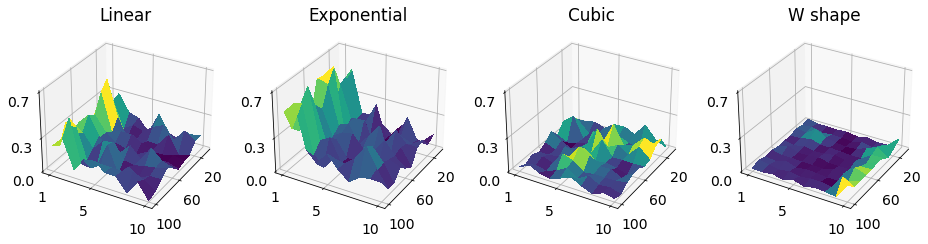

In [121]:
fig = plt.figure(figsize=(16, 8))

# First subplot for hd_linear_var0.csv
ax1 = fig.add_subplot(141, projection='3d')

# Construct arrays for the anchor positions of the bars.
x = [10,20,30,40,50,60,70,80,90,100]
y = [1,2,3,4,5,6,7,8,9,10]
X, Y = np.meshgrid(x, y)
#R = np.sqrt(X**2 + Y**2)
Z = np.array(df_1)

# Create the bar3d
ax1.plot_surface(X, Y, Z, cmap='viridis',
                       linewidth=0, antialiased=False)

# Set the labels
ax1.set_zlim(0, 0.7)
ax1.view_init(30, 30)
ax1.set(xlabel=None,xticks=[20,60,100])
ax1.set(ylabel=None,yticks=[1,5,10])
ax1.set(zlabel=None,zticks=[0,0.3,0.7])
ax1.set_title('Linear')

# Second subplot for hd_exp_var0.csv
ax2 = fig.add_subplot(142, projection='3d')

Z1 = np.array(df_2)

ax2.plot_surface(X, Y, Z1, cmap='viridis',
                       linewidth=0, antialiased=False)

# Set the labels
ax2.set_zlim(0, 0.7)
ax2.view_init(30, 30)
ax2.set(xlabel=None,xticks=[20,60,100])
ax2.set(ylabel=None,yticks=[1,5,10])
ax2.set(zlabel=None,zticks=[0,0.3,0.7])
ax2.set_title('Exponential')

# Second subplot for hd_exp_var0.csv
ax3 = fig.add_subplot(143, projection='3d')

Z2 = np.array(df_3)

ax3.plot_surface(X, Y, Z2, cmap='viridis',
                       linewidth=0, antialiased=False)

# Set the labels
ax3.set_zlim(0, 0.7)
ax3.view_init(30, 30)
ax3.set(xlabel=None,xticks=[20,60,100])
ax3.set(ylabel=None,yticks=[1,5,10])
ax3.set(zlabel=None,zticks=[0,0.3,0.7])
ax3.set_title('Cubic')

# Second subplot for hd_exp_var0.csv
ax4 = fig.add_subplot(144, projection='3d')

Z3 = np.array(abs(df_4))

ax4.plot_surface(X, Y, Z3, cmap='viridis',
                       linewidth=0, antialiased=False)

# Set the labels
ax4.set_zlim(0, 0.2)
ax4.view_init(30, 30)
ax4.set(xlabel=None,xticks=[20,60,100])
ax4.set(ylabel=None,yticks=[1,5,10])
ax4.set(zlabel=None,zticks=[0,0.3,0.7])
ax4.set_title('W shape')

# Add colorbar
#fig.colorbar(surf, ax=[ax1, ax2, ax3, ax4], shrink=0.5, aspect=15)
plt.savefig(".../sim_results/fig/hd_var005.svg",format='svg')

plt.show()

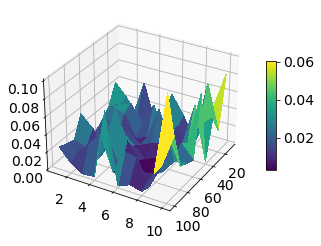

In [107]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x = [10,20,30,40,50,60,70,80,90,100]
y = [1,2,3,4,5,6,7,8,9,10]
X, Y = np.meshgrid(x, y)
#R = np.sqrt(X**2 + Y**2)
Z = np.array(abs(df_4))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='viridis',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 0.1)

ax.view_init(30, 30)

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig(".../sim_results/fig/hd_Wshape_var0.svg",format='svg')

plt.show()

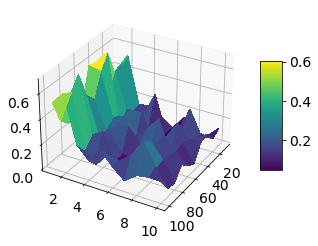

In [85]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x = [10,20,30,40,50,60,70,80,90,100]
y = [1,2,3,4,5,6,7,8,9,10]
X, Y = np.meshgrid(x, y)
#R = np.sqrt(X**2 + Y**2)
Z = np.array(df_2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='viridis',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 0.7)

ax.view_init(30, 30)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig(".../sim_results/fig/hd_exp_var005.svg",format='svg')

plt.show()

In [15]:
Type = []
NoiseLevel = []
Value = []
Nodes = []

for i in re_type:
    path_1 = ".../sim_results/dep_diff_dist1/tcor_" + i + "_var0.csv"
    df_1 = pd.read_csv(path_1)
    df_1 = df_1.drop(columns=['Unnamed: 0'])
    path_2 = ".../sim_results/dep_diff_dist1/tcor_" + i + "_var005.csv"
    df_2 = pd.read_csv(path_2)
    df_2 = df_2.drop(columns=['Unnamed: 0'])
    row_mean1 = list(df_1.mean(axis=1))
    Value = Value + row_mean1
    Type = Type + [i]*9
    NoiseLevel = NoiseLevel + ['NoiseLevel:0']*9
    Nodes = Nodes + [50,150,200,250,300,350,400,450,500]
    row_mean2 = list(df_2.mean(axis=1))
    Value = Value + row_mean2
    Type = Type + [i]*9
    NoiseLevel = NoiseLevel + ['NoiseLevel:0.05']*9
    Nodes = Nodes + [50,150,200,250,300,350,400,450,500]

In [16]:
new_df = pd.DataFrame(
data = {
    'Type':Type,
    'NoiseLevel':NoiseLevel,
    'Value':Value,
    'Nodes':Nodes
}
)
new_df.head()

,Type,NoiseLevel,Value,Nodes
0,linear,NoiseLevel:0,0.232503,50
1,linear,NoiseLevel:0,0.325800,150
2,linear,NoiseLevel:0,0.456297,200
3,linear,NoiseLevel:0,0.577378,250
4,linear,NoiseLevel:0,0.654180,300


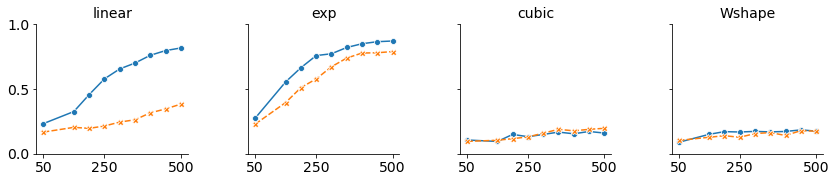

In [18]:
plt.rcParams.update({'font.size': 14,'xtick.labelsize':14,'ytick.labelsize':14,'legend.fontsize': 14})
g = sns.relplot(
    data=new_df, x="Nodes", y="Value", hue="NoiseLevel", col="Type",col_wrap=4,
    markers = True,
    style="NoiseLevel", kind="line",
    height=3, aspect=1,
    linewidth=1.5,legend =False
)
g.set(xlabel=None,xticks=[50,250,500])
g.set(ylabel=None,yticks=[0,0.5,1])
#g.map(plt.axhline, y=0.05, ls="-.", color="gray")
#g.axhline(0.05, ls='-.', linewidth=1, color='gray')
g.set_titles(col_template = '{col_name}')
new_title = '' 
#g._legend.set_title(new_title)
g.fig.subplots_adjust(hspace=0.4,wspace=0.4)

plt.savefig(".../sim_results/fig/compare_uni_dist.svg",format='svg')

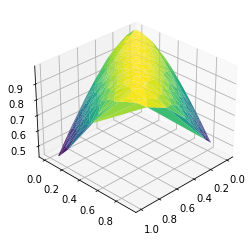

In [52]:
def f(x, y):
    return np.exp(-pow(x - y, 2))

x = np.random.beta(1, 2, 500)
y = np.random.beta(1, 2, 500)
z = f(x, y)

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')

ax.view_init(30, 45)

plt.savefig('.../sim_results/fig/exp_xx.svg',format='svg')
plt.show()

In [ ]:
def f(x, y):
    return np.exp(-abs(x-y))

x0 = np.exp(x) + np.random.normal(0, 0.05, nodes)
y0 = np.exp(y) + np.random.normal(0, 0.05, nodes)
z = f(x0, y0)

ax = plt.axes(projection='3d')
ax.plot_trisurf(x0, y0, z,
                cmap='viridis', edgecolor='none')

ax.view_init(30, 45)
plt.savefig('.../sim_results/fig/exp_yy.svg',format='svg')

plt.show()

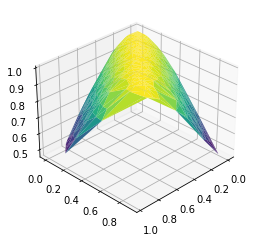

In [137]:
def f(x, y):
    return np.exp(-pow(x - y, 2))

x = np.random.beta(1, 2, 500)
y = np.random.beta(1, 2, 500)
z = f(x, y)

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')

ax.view_init(30, 45)

plt.savefig('.../sim_results/fig/cubic_xx.svg',format='svg')
plt.show()

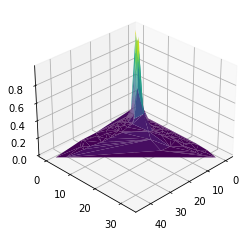

In [138]:
def f(x, y):
    return np.exp(-abs(x-y))

x0 = 128*np.power(x-1/3,3) + 48*np.power(x-1/3,2) -12*(x-1/3) + np.random.normal(0, 0.05, nodes)
y0 = 128*np.power(y-1/3,3) + 48*np.power(y-1/3,2) -12*(y-1/3) + np.random.normal(0, 0.05, nodes)
z = f(x0, y0)

ax = plt.axes(projection='3d')
ax.plot_trisurf(x0, y0, z,
                cmap='viridis', edgecolor='none')

ax.view_init(30, 45)
plt.savefig('.../sim_results/fig/cubic_yy.svg',format='svg')

plt.show()

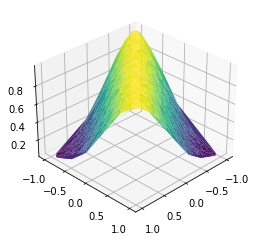

In [82]:
def f(x, y):
    return np.exp(-pow(x - y, 2))

x = np.random.uniform(-1, 1, size=500)
y = np.random.uniform(-1, 1, size=500)
z = f(x, y)

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')

ax.view_init(30, 45)

plt.savefig('.../sim_results/fig/Wshape_xx.svg',format='svg')
plt.show()

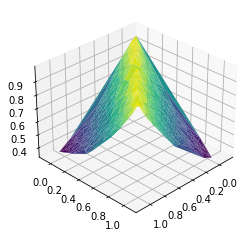

In [83]:
def f(x, y):
    return np.exp(-abs(x-y))

x0 = 4*(np.power(np.power(x,2)-1/2,2)+np.random.uniform(-1,1,nodes)/500) + 0.5*np.random.normal(0, 0.1, nodes)
y0 = 4*(np.power(np.power(y,2)-1/2,2)+np.random.uniform(-1,1,nodes)/500) + 0.5*np.random.normal(0, 0.1, nodes)
z = f(x0, y0)

ax = plt.axes(projection='3d')
ax.plot_trisurf(x0, y0, z,
                cmap='viridis', edgecolor='none')

ax.view_init(30, 45)
plt.savefig('.../sim_results/fig/Wshape_yy.svg',format='svg')

plt.show()

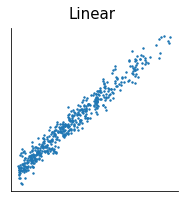

In [129]:
#Linear
fig, ax = plt.subplots(figsize=(3, 3))

nodes = 500
x = np.random.beta(1, 2, size=nodes)
y = x + np.random.normal(0, 0.05, nodes)

plt.scatter(x,y,s=2)

ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle('Linear',fontsize=15)

plt.savefig('.../sim_results/fig/linear.svg',format='svg')

plt.show()

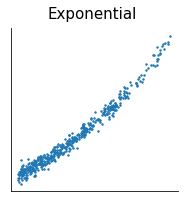

In [130]:
fig, ax = plt.subplots(figsize=(3, 3))

nodes = 500
x = np.random.beta(1, 2, size=nodes)
y = np.exp(x) + np.random.normal(0, 0.05, nodes)

plt.scatter(x,y,s=2)

ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle('Exponential',fontsize=15)

plt.savefig('.../sim_results/fig/exp.svg',format='svg')

plt.show()

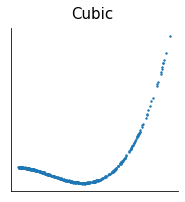

In [131]:
fig, ax = plt.subplots(figsize=(3, 3))

nodes = 500

x = np.random.beta(1, 2, size=nodes)
y = 128*np.power(x-1/3,3) + 48*np.power(x-1/3,2) -12*(x-1/3) + np.random.normal(0, 0.1, nodes)


plt.scatter(x,y,s=2)

ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle('Cubic',fontsize=15)

plt.savefig('.../sim_results/fig/cubic.svg',format='svg')

plt.show()

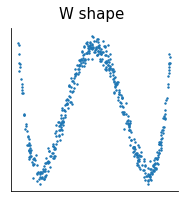

In [133]:
fig, ax = plt.subplots(figsize=(3, 3))

nodes = 500

x = np.random.uniform(-1, 1, size=nodes)
y = 4*(np.power(np.power(x,2)-1/2,2)+np.random.uniform(-1,1,nodes)/500) + 0.5*np.random.normal(0, 0.1, nodes)

plt.scatter(x,y,s=2)

ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle('W shape',fontsize=15)

plt.savefig('.../sim_results/fig/Wshape.svg',format='svg')

plt.show()